In [1]:
import pandas as pd
from paintone_rsn.data_loading import load_subjectiid, exclusion, load_timeseries, samplecalibration
from paintone_rsn.data_preproc import connectivity_matrix, connectivitylabelname
import paintone_rsn.mlfunctions as myml
from scipy.stats import pearsonr
import numpy as np
import pickle
import matplotlib.pyplot as plt

In [8]:
# load model
# saving the model for further use
filename = 'C:/Users/lenov/PycharmProjects/paintone_rsn/data_out/final_model_M1.sav'
m_scr = pickle.load(open(filename, 'rb'))

# Validation dataset 1

In [41]:
pathtovalidationsmpl_1="C:/Users/lenov/PycharmProjects/paintone_rsn/data_in/validation_smpl1/"
s1_dict_subjID_idx = load_subjectiid(pathtovalidationsmpl_1+'subjectsIDs.txt')
s1_subjID_idx_incl, subjID_idx_excl,motioninf_curr = exclusion(pathtovalidationsmpl_1+'motion_summary.csv',
                                             dict_subjID_idx=s1_dict_subjID_idx,
                                             excl_subj=[5,32]) #8,17,20,24,26,
# 5-felt asleep during the scan,but he is removed anyway bc of motion
# 32-incidental finding, registration does not work well
timeseries_vs1, \
labels, \
loadedsubjpath, \
vectorizedlabels, \
listoflabelpairs = load_timeseries(pathtovalidationsmpl_1+'regional_timeseries/',
                                   s1_subjID_idx_incl.values(),
                                   fddir=[pathtovalidationsmpl_1+"calculate_FD_Power/mapflow/"],
                                   numofexlcvolsatthebeg=0)
X, cm = connectivity_matrix(timeseries_vs1)

s1_features_scr = pd.DataFrame(X,
            columns=(vectorizedlabels),
            index = s1_subjID_idx_incl.keys())

# load behavior data which was preprocessed with R
s1_behav = pd.read_csv(pathtovalidationsmpl_1+'validation_smpl1_behav.csv', #allbehavdata.csv',
                         index_col=['sub'],
                          ).loc[s1_subjID_idx_incl.keys(),:]

These are the subjects subjectID who were excluded:	dict_keys([5, 8, 10, 20, 25, 30, 32])
These are the subjects ordererID who were excluded:	dict_values([4, 7, 9, 19, 24, 29, 31])
These are the subjects subjectID who were included:	dict_keys([1, 2, 3, 4, 6, 7, 9, 11, 12, 13, 14, 15, 16, 17, 18, 19, 21, 22, 23, 24, 26, 27, 28, 29, 31, 33])
These are the subjects ordererID who were included:	dict_values([0, 1, 2, 3, 5, 6, 8, 10, 11, 12, 13, 14, 15, 16, 17, 18, 20, 21, 22, 23, 25, 26, 27, 28, 30, 32])
In total we work with	26	 participants.
 Check if all the aprticipanst have behavior data!!!!
Number of participant excluded based in the motion parameters(FD>0.15,scrubbed percent>25):5
this is their subjID 	5	and this is thier orderID:	4
this is their subjID 	8	and this is thier orderID:	7
this is their subjID 	10	and this is thier orderID:	9
this is their subjID 	20	and this is thier orderID:	19
this is their subjID 	25	and this is thier orderID:	24
this is their subjID 	30	and this is t

c:\users\lenov\pycharmprojects\paintone_rsn\venv\lib\site-packages\sklearn\base.py:443: UserWarning: X has feature names, but SelectKBest was fitted without feature names
  warnings.warn(
c:\users\lenov\pycharmprojects\paintone_rsn\venv\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


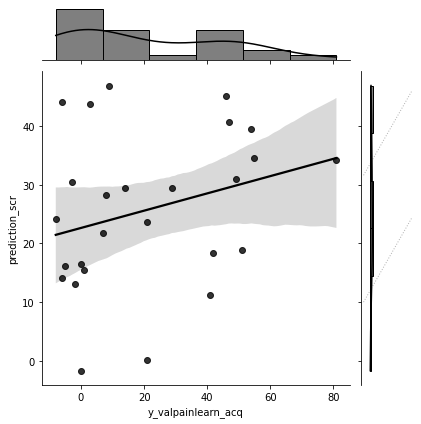

Number of pariticpants:26
p-value based on the predstat function(one-sided):0.08382127312327191
r2 based on the predstat function:0.07779436489650246
Observed pearson R: 0.28
and the corresponding p-value: 0.17
p-value based on permutation test: 0.0839916


In [42]:
s1_behav['prediction_scr']=m_scr.predict(s1_features_scr)
# s1_behav['prediction_scr_firstvolsexcl']=m0_scr_first5excl.predict(s1_features_scr)
obsvar='y_valpainlearn_acq'
predvar='prediction_scr'
dataset=s1_behav
myml.plot_prediction(dataset[obsvar],dataset[predvar])
p_value_myml, r_2_myml, residual, regline = myml.pred_stat(dataset[obsvar],
                                                           dataset[predvar],robust=False,
                                                           regside='greater')
print('Number of pariticpants:'+str(len(dataset)))
print('p-value based on the predstat function(one-sided):' + str(p_value_myml))
print('r2 based on the predstat function:' + str(r_2_myml))
print('Observed pearson R: %.2f' % pearsonr(dataset[obsvar],
                                            dataset[predvar])[0])
print('and the corresponding p-value: %.2f' % pearsonr(dataset[obsvar],
                                                       dataset[predvar])[1])


p_value_perm = myml.permutation_test(dataset[obsvar],
                                dataset[predvar],
                           method='approximate',
                           func=lambda x, y: np.corrcoef(x,y)[1][0],
                           num_rounds=10000,
                           seed=0)
print('p-value based on permutation test: %.7f' % p_value_perm)

In [44]:
#saving the prediction
s1_behav
s1_behav.to_csv(pathtovalidationsmpl_1+'validation_smpl1_behav_excl.csv')

# Validation dataset 2

In [88]:
pathtovalidationsmpl_2="C:/Users/lenov/PycharmProjects/paintone_rsn/data_in/validation_smpl2/"
dict_subjID_idx_Pawlik = load_subjectiid(pathtovalidationsmpl_2+'subjectsIDs.txt')
subjID_idx_incl_Pawlik, subjID_idx_excl_Pawlik, motioninf_pawlik = exclusion(pathtovalidationsmpl_2+'motion_summary.csv',
                                             dict_subjID_idx=dict_subjID_idx_Pawlik,
                                             excl_subj=[])
# consider removing subj
timeseries_Pawlik, \
labels_Pawlik, \
loadedsubjpath_Pawlik, \
vectorizedlabels_Pawlik, \
listoflabelpairs_pawlik = load_timeseries(pathtovalidationsmpl_2+'regional_timeseries/',
                                          subjID_idx_incl_Pawlik.values(),
                                          fddir=[pathtovalidationsmpl_2+"calculate_FD_Power/mapflow/"],
                                          numofexlcvolsatthebeg=0)

X_Pawlik, cm_Pawlik = connectivity_matrix(timeseries_Pawlik)

Sexternal_features_scr= pd.DataFrame(X_Pawlik,
            columns=(vectorizedlabels_Pawlik),
            index = subjID_idx_incl_Pawlik.keys())


Sexternal_behav = pd.read_csv(pathtovalidationsmpl_2+'validation_smpl2_behav.csv',
                         index_col='VPN',
                          ).loc[subjID_idx_incl_Pawlik.keys(),:]
print('The current behavior variable set, which was preapred with R')
print(Sexternal_behav.columns)

These are the subjects subjectID who were excluded:	dict_keys([1049, 1092, 1093, 1113, 1117])
These are the subjects ordererID who were excluded:	dict_values([7, 18, 19, 25, 26])
These are the subjects subjectID who were included:	dict_keys([1015, 1022, 1029, 1032, 1037, 1039, 1048, 1053, 1055, 1060, 1066, 1067, 1074, 1076, 1077, 1083, 1089, 1094, 1096, 1097, 1108, 1111, 1118])
These are the subjects ordererID who were included:	dict_values([0, 1, 2, 3, 4, 5, 6, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 20, 21, 22, 23, 24, 27])
In total we work with	23	 participants.
 Check if all the aprticipanst have behavior data!!!!
Number of participant excluded based in the motion parameters(FD>0.15,scrubbed percent>25):5
this is their subjID 	1049	and this is thier orderID:	7
this is their subjID 	1092	and this is thier orderID:	18
this is their subjID 	1093	and this is thier orderID:	19
this is their subjID 	1113	and this is thier orderID:	25
this is their subjID 	1117	and this is thier orderID:	26

In [90]:
Sexternal_conf = pd.read_csv(pathtovalidationsmpl_2+'validation_smpl2_behav_excl_confounder.csv',
                         index_col='VPN',
                          )
Sexternal_conf['y_valpainlearn_acq']=Sexternal_behav['y_valpainlearn_acq']
Sexternal_conf['y_valtonelearn_acq']=Sexternal_behav['y_valtonelearn_acq']
Sexternal_conf['y_valpainlearn_ext']=Sexternal_behav['y_valpainlearn_lastacq_ext']
Sexternal_conf['y_valtonelearn_ext']=Sexternal_behav['y_valtonelearn_lastacq_ext']
Sexternal_conf.to_csv("C:/Users/lenov/PycharmProjects/paintone_rsn/data_in/validation_smpl2/validation_smpl2_behav_excl_confounder.csv")

c:\users\lenov\pycharmprojects\paintone_rsn\venv\lib\site-packages\sklearn\base.py:443: UserWarning: X has feature names, but SelectKBest was fitted without feature names
  warnings.warn(
c:\users\lenov\pycharmprojects\paintone_rsn\venv\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


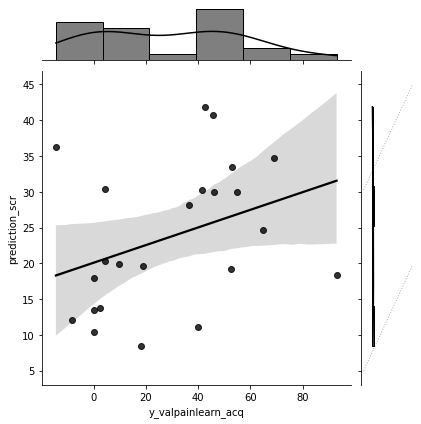

Number of pariticpants:23
p-value based on the predstat function(one-sided):0.04909953371675553
r2 based on the predstat function:0.1248124612695694
Observed pearson R: 0.35
and the corresponding p-value: 0.10
p-value based on permutation test: 0.0485951


In [89]:
# calculate derived valence rating for all participants.
# pain learning based on my definition in acquisition phase
Sexternal_behav['y_valpainlearn_acq']=\
    ((Sexternal_behav['CSVis_A_2']-Sexternal_behav['CSVis_A_0'])-\
    (Sexternal_behav['CSMinus_A_2']-Sexternal_behav['CSMinus_A_0']))/2
Sexternal_behav['y_valtonelearn_acq']=\
    ((Sexternal_behav['CSAud_A_2']-Sexternal_behav['CSAud_A_0'])-\
    (Sexternal_behav['CSMinus_A_2']-Sexternal_behav['CSMinus_A_0']))/2
#checking this publication(https://www.nature.com/articles/s42003-021-02008-1#Sec9) in which the study 2 is part of Robert's shared data
# They had the extinction on a separate day, and they measured valence right before extiction. We can use that as well.
Sexternal_behav['y_valpainlearn_lastacq_ext']=\
    ((Sexternal_behav['CSVis_E_2']-Sexternal_behav['CSVis_A_2'])-\
    (Sexternal_behav['CSMinus_E_2']-Sexternal_behav['CSMinus_A_2']))/2
Sexternal_behav['y_valtonelearn_lastacq_ext']=\
    ((Sexternal_behav['CSAud_E_2']-Sexternal_behav['CSAud_A_2'])-\
    (Sexternal_behav['CSMinus_E_2']-Sexternal_behav['CSMinus_A_2']))/2

Sexternal_behav['y_valpainlearn_proper_ext']=\
    ((Sexternal_behav['CSVis_E_2']-Sexternal_behav['CSVis_E_0'])-\
    (Sexternal_behav['CSMinus_E_2']-Sexternal_behav['CSMinus_E_0']))/2
Sexternal_behav['y_valtonelearn_proper_ext']=\
    ((Sexternal_behav['CSAud_E_2']-Sexternal_behav['CSAud_E_0'])-\
    (Sexternal_behav['CSMinus_E_2']-Sexternal_behav['CSMinus_E_0']))/2




Sexternal_behav['prediction_scr']=m_scr.predict(Sexternal_features_scr)

obsvar='y_valpainlearn_acq'
predvar='prediction_scr'
dataset=Sexternal_behav
myml.plot_prediction(dataset[obsvar],dataset[predvar])
p_value_myml, r_2_myml, residual, regline = myml.pred_stat(dataset[obsvar],
                                                           dataset[predvar],robust=False,
                                                           regside='greater')
print('Number of pariticpants:'+str(len(dataset)))
print('p-value based on the predstat function(one-sided):' + str(p_value_myml))
print('r2 based on the predstat function:' + str(r_2_myml))
print('Observed pearson R: %.2f' % pearsonr(dataset[obsvar],
                                            dataset[predvar])[0])
print('and the corresponding p-value: %.2f' % pearsonr(dataset[obsvar],
                                                       dataset[predvar])[1])


p_value_perm = myml.permutation_test(dataset[obsvar],
                                dataset[predvar],
                           method='approximate',
                           func=lambda x, y: np.corrcoef(x,y)[1][0],
                           num_rounds=10000,
                           seed=0)
print('p-value based on permutation test: %.7f' % p_value_perm)

# Pooled dataset (validation dataset 1+2)

This is the explained variance in the total validation sample: 11.0
calibrated: (0.33462019197092285, 0.018770136517755845)


c:\users\lenov\pycharmprojects\paintone_rsn\venv\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


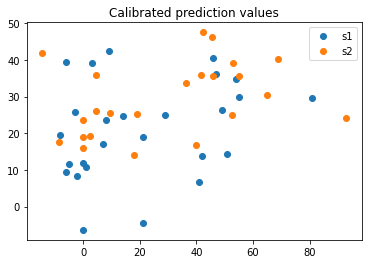

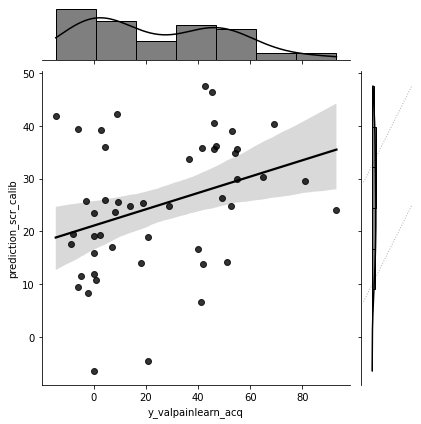

Number of pariticpants:49
p-value based on the predstat function(one-sided):0.009385068258877942
r2 based on the predstat function:0.11197067287465719
Observed pearson R: 0.33
and the corresponding p-value: 0.02
p-value based on permutation test: 0.0085991


In [77]:
concat_behav=samplecalibration(s1_behav,Sexternal_behav)
p_value_myml,r_2_myml,residual,regline=myml.pred_stat(concat_behav['y_valpainlearn_acq'],
               concat_behav['prediction_scr_calib'],#m_scr.predict(concat_feature), #s1_features_scr
               robust=False,
               regside='greater')
print('This is the explained variance in the total validation sample: '+ str(round(r_2_myml,2)*100))

groups = concat_behav.groupby("study")
obsvar='y_valpainlearn_acq'
predvar='prediction_scr_calib'
dataset=concat_behav
plt.figure()
for name, group in groups:
    plt.plot(group["y_valpainlearn_acq"],
             group["prediction_scr_calib"], marker="o", linestyle="", label=name)
plt.legend()
print('calibrated:',pearsonr(concat_behav["y_valpainlearn_acq"],
             concat_behav["prediction_scr_calib"]))
plt.title('Calibrated prediction values')
myml.plot_prediction(concat_behav["y_valpainlearn_acq"],
             concat_behav["prediction_scr_calib"])
p_value_perm = myml.permutation_test(dataset[obsvar],
                                dataset[predvar],
                           method='approximate',
                           func=lambda x, y: np.corrcoef(x,y)[1][0],
                           num_rounds=10000,
                           seed=0)
print('Number of pariticpants:'+str(len(dataset)))
print('p-value based on the predstat function(one-sided):' + str(p_value_myml))
print('r2 based on the predstat function:' + str(r_2_myml))
print('Observed pearson R: %.2f' % pearsonr(dataset[obsvar],
                                            dataset[predvar])[0])
print('and the corresponding p-value: %.2f' % pearsonr(dataset[obsvar],
                                                       dataset[predvar])[1])
print('p-value based on permutation test: %.7f' % p_value_perm)

